# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [55]:
# Import your libraries:
from sklearn.datasets import load_diabetes
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Challenge 1 - Explore the Scikit-Learn Datasets

Before starting to work on our own datasets, let's first explore the datasets that are included in this Python library. These datasets have been cleaned and formatted for use in ML algorithms.

First, we will load the diabetes dataset. Do this in the cell below by importing the datasets and then loading the dataset  to the `diabetes` variable using the `load_diabetes()` function.

In [56]:
diabetes = load_diabetes()

Let's explore this variable by looking at the different attributes. Do this by looking at the `keys()` of this variable.

In [57]:
diabetes.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

The next step is to read the description of the dataset. Print the description in the cell below using the `DESCR` attribute of the `diabetes` variable

In [58]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

What are the variables in this dataset according to the description? List them in the markdown cell below

#### Enter your answer here:




```We have 10 columns: age & sex are obvious, bmi is body mass index which tells if a person is overweight[bmi = mass/(height^2)], bp is blood pressure, s1 measures you T-cells(a type of white blood cell), s2 measures you low-density lipoprotiens which is a "bad" cholesterol, hdl is "good" cholesterol, s4 is a thyroid hormone, s5 is an anti-eplileptic drug,and s6 is glucose blood sugar level. 
```

Now explore the data. Scikit-learn typically takes in 2D numpy arrays as input (though pandas dataframes are also accepted). In the cell below find the shape of the numpy array contained in the data portion of the diabetes variable.

In [59]:
diabetes.data.shape

(442, 10)

In [60]:
X,y = load_diabetes(return_X_y=True)
X = pd.DataFrame(X)
y = pd.DataFrame(y)
X.columns = load_diabetes()["feature_names"]

In [61]:
col_names = load_diabetes()['feature_names']

In [62]:
df = pd.DataFrame(X, columns= col_names)

In [63]:
df["DIAB"] = y

In [64]:
corr = df.corr()

In [65]:
corr["DIAB"].sort_values()

s3     -0.394789
sex     0.043062
s2      0.174054
age     0.187889
s1      0.212022
s6      0.382483
s4      0.430453
bp      0.441484
s5      0.565883
bmi     0.586450
DIAB    1.000000
Name: DIAB, dtype: float64

# Challenge 2 - Perform Supervised Learning on the Dataset

#### The data has already been split to predictor and response variables. The response variable is in the `target` portion of the variable. 

Given this information, let's apply what we have previously learned about linear regression and apply the algorithm to the diabetes dataset. In the cell below, import the linear regression class from sklearn. 

Initialize the model in the variable `diabetes_model`

In [107]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["DIAB"]), 
                                                    df["DIAB"])


In [108]:
error = pd.DataFrame(columns=["train_mse", "test_mse"])

In [109]:
lr1 = LinearRegression()
# only bmi
lr1.fit(X_train["bmi"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr1.predict(X_train["bmi"].to_frame()))
mse_test = mean_squared_error(y_test, lr1.predict(X_test["bmi"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="bmi"))

In [110]:
lr2 = LinearRegression()
## ONLY s3
lr2.fit(X_train["s3"].to_frame(), y_train)
mse_train = mean_squared_error(y_train, lr2.predict(X_train["s3"].to_frame()))
mse_test = mean_squared_error(y_test, lr2.predict(X_test["s3"].to_frame()))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="s3"))

In [111]:
lr3 = LinearRegression()
## ONLY bmi AND s3
lr3.fit(X_train[["bmi","s3"]], y_train)
mse_train = mean_squared_error(y_train, lr3.predict(X_train[["bmi","s3"]]))
mse_test = mean_squared_error(y_test, lr3.predict(X_test[["bmi","s3"]]))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="bmi & s3"))

In [112]:
lr4 = LinearRegression()
## ALL COLUMNS
lr4.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, lr4.predict(X_train))
mse_test = mean_squared_error(y_test, lr4.predict(X_test))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="All columns"))

In [113]:
error

,train_mse,test_mse
bmi,3849.754165,4018.403283
s3,4766.206140,5759.924417
bmi & s3,3571.046938,3990.532715
All columns,2805.760073,3075.778741


In [114]:
X_train.shape

(331, 10)

In [74]:
# This Feature Cross seems to have created 65 columns!!!
columns = X_train.columns
for i in range(len(columns)):
    for j in range(i,len(columns)):
        col1 = columns[i]
        col2 = columns[j]
        X_train[f"{col1}*{col2}"] = X_train[col1]*X_train[col2]
        X_test[f"{col1}*{col2}"] = X_test[col1]*X_test[col2]



In [75]:
X_train.shape

(331, 65)

In [115]:
lr5 = LinearRegression()
## ALL COLUMNS + SYNTHETIC
lr5.fit(X_train, y_train)
mse_train = mean_squared_error(y_train, lr5.predict(X_train))
mse_test = mean_squared_error(y_test, lr5.predict(X_test))
error = error.append(pd.Series({"train_mse":mse_train, "test_mse":mse_test}, name="All + Synthetic Columns"))

In [116]:
error

,train_mse,test_mse
bmi,3849.754165,4018.403283
s3,4766.206140,5759.924417
bmi & s3,3571.046938,3990.532715
All columns,2805.760073,3075.778741
All + Synthetic Columns,2805.760073,3075.778741


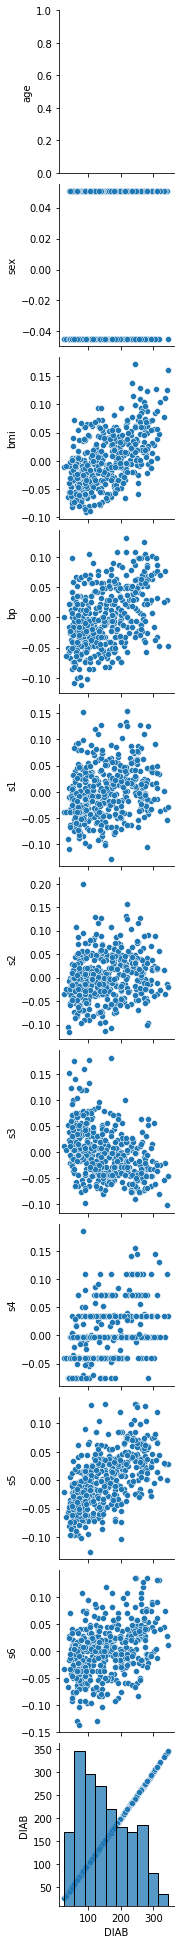

In [78]:
sns.pairplot(df, x_vars=["DIAB"], y_vars=df.columns);

In [79]:

synth = df.copy()
columns = synth.columns
for i in range(len(columns)-1):
    for j in range(i,len(columns)-1):
        col1 = columns[i]
        col2 = columns[j]
        synth[f"{col1}*{col2}"] = synth[col1]*synth[col2]

In [80]:
synth.shape

(442, 66)

In [81]:

synth.corr()["DIAB"].abs().sort_values(ascending=False).head(10)

DIAB       1.000000
bmi        0.586450
s5         0.565883
bp         0.441484
s4         0.430453
s3         0.394789
s6         0.382483
bmi*bmi    0.252642
s1         0.212022
age        0.187889
Name: DIAB, dtype: float64

In [82]:
synth.corr()["DIAB"]["s5"]

0.5658834252428101

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


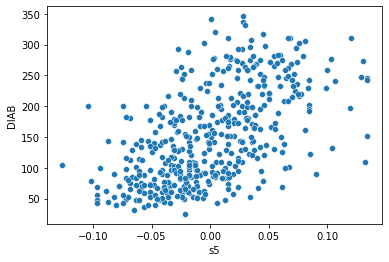

In [84]:
sns.scatterplot(synth["s5"], synth["DIAB"]);

/usr/local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


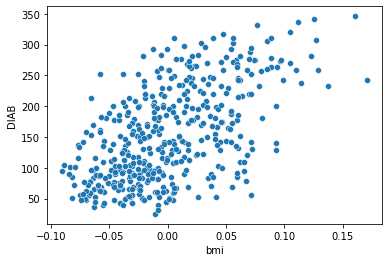

In [85]:
sns.scatterplot(synth["bmi"], synth["DIAB"]);

In [ ]:
scatter_matrix()
pyplot.show()

In the cell below, fit the model and print the intercept and coefficients of the model. 

In [119]:
def row(data,row_number,k):
    return [sum([e**(row_number+i) for e in data])for i in range(k+1)]

def matrix_m(data,k):
    return np.array([row(data, i, k) for i in range(k+1)], dtype='float')

def vector_b(x,y,k):
    return np.array([sum((x**i)*y) for i in range(k+1)], dtype='float')

In [120]:
M = matrix_m(synth["bmi"], k=1)
M

array([[ 4.42000000e+02, -3.55604435e-13],
       [-3.55604435e-13,  1.00000000e+00]])

In [122]:
b = vector_b(synth["bmi"], synth["DIAB"], k=1)

In [123]:
coef = np.linalg.solve(M,b)

In [124]:
# we see the coefficients m is first and is slope
# b is second and is the y_intercept
coef

array([152.13348416, 949.43526038])

# Bonus Challenge 1 - Conduct a Hypothesis Test on the Model

Once we have generated a linear model, we can test each coefficient using a t-test to see whether the confidence interval for the variable contains zero. We can also perform an overall F test to check whether at least one coefficient is significantly different from zero. 

Refer to the resource in this [link](https://onlinecourses.science.psu.edu/stat501/node/297/) for more details and perform the t-tests for the model above. Additionally, interpret the results and list coefficients are significantly different from zero.


Hint: use the statsmodels package.

Your result should look similar to this:

![ols](../ols-results.png)

In [182]:
# Your code here:



# Challenge 2 - Peform Supervised Learning on a Pandas Dataframe

Now that we have looked at data that has been formatted for scikit-learn, let's look at data that we will need to format ourselves.

In the next cell, load the `auto-mpg.csv` file included in this folder and assign it to a variable called `auto`.

In [183]:
# Your code here:

auto = pd.read_csv('../auto-mpg.csv')

Look at the first 5 rows using the `head()` function:

In [184]:
# Your code here:



Evaluate the data to ensure that all numeric columns are correctly detected as such by pandas. If a column is misclassified as object, coerce it to numeric.

In [185]:
# Your code here:



What is the newest model year and the oldest model year?

In [186]:
# Your code here:



Check the dataset for missing values and remove all rows containing at least one missing value.

In [187]:
# Your code here:



Find the frequency table for the `cylinders` column using the `value_counts()` function. How many possible values of cylinders are there?

In [188]:
# Your code here:



We would like to generate a linear regression model that will predict mpg. To do this, first drop the `car_name` column since it does not contain any quantitative data. Next separate the dataframe to predictor and response variables. Separate those into test and training data with 80% of the data in the training set and the remainder in the test set. 

Assign the predictor and response training data to `X_train` and `y_train` respectively. Similarly, assign the predictor and response test data to `X_test` and `y_test`.

In [189]:
# Import the necessary function



In [190]:
# Your code here:



Now we will the dataset that we processed and peform linear regression on this data to predict the mpg for each vehicle. Initialize the model in the cell below.

In [191]:
# Your code here:



Next, fit the model in the cell below.

In [192]:
# Your code here:



# Challenge 3 - Evaluate the Model

the r squared score of a model tells us how much variation is explained by the model. In a typical dataset, most observations differ from the mean. When we create a model, we are trying to generate an equation that will tell us by how much each observation will differ from the mean. Obviously, the vast majority of models are not perfect. They can only predict some of the variation from the mean but not all of it. We attribute the rest of the difference between the actual value and the mean to random error. We would like random error to explain the as little as possible of the variation. This is why the r squared score is an important metric.

In the next cell, compute the r squared score of the model. Do this by first computing the predicted values and assign them to `y_pred`.

In [193]:
# Import the necessary function:



In [194]:
# Your code here:



#### Our next step is to evaluate the model using the test data. We would like to ensure that our model is not overfitting the data. This means that our model will not be able to generalize well outside of the training data.

In the cell below, use the model to generate the predicted values for the training data and assign them to `y_test_pred`. Compute the r squared score for the test data by comparing the oberserved `y_test` data and the predicted `y_test_pred`.

In [195]:
# Your code here:



# Challenge 4 - Improve the Model Fit

While the most common way to improve the fit of a model is by using regularization, there are other simpler ways to improve model fit. The first is to create a simpler model. The second is to increase the train sample size.

Let us start with the easier option and increase our train sample size to 90% of the data. Create a new test train split and name the new predictors and response variables `X_train09`, `X_test09`, `y_train09`, `y_test09`.

In [196]:
# Your code here:



Initialize a new model. Name this model `auto_model09`. Fit the model to the new sample data.

In [197]:
# Your code here:



Compute the predicted values and r squared score for our new model and new sample data.

In [198]:
# Your code here:



Compute the r squared score for the smaller test set. Is there an improvement in the test r squared?

In [199]:
# Your code here:



# Bonus Challenge 2 - Backward Elimination 

The main way to produce a simpler linear regression model is to reduce the number of variables used in the model. In scikit-learn, we can do this by using recursive feature elimination. You can read more about RFE [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html).

In the next cell, we will import RFE

Follow the documentation and initialize an RFE model using the `auto_model` linear regression model. Set `n_features_to_select=3`

In [200]:
# Your code here:



Fit the model and print the ranking

In [201]:
# Your code here:



Feature importance is ranked from most important (1) to least important (4). Generate a model with the three most important features. The features correspond to variable names. For example, feature 1 is `cylinders` and feature 2 is `displacement`.

Perform a test-train split on this reduced column data and call the split data `X_train_reduced`, `X_test_reduced`, `y_test_reduced`, `y_train_reduced`. Use an 80% split.

In [202]:
# Your code here:



Generate a new model called `auto_model_reduced` and fit this model. Then proceed to compute the r squared score for the model. Did this cause an improvement in the r squared score?

In [203]:
# Your code here: 

